# Welcome to Lab_Plots! 🕵🏻‍♂️ 📊 🕵🏻‍♀️

Fun fact: Every employee at the University of Illinois is a "public employee" and all public employee salaries are [publicly available online](https://www.bot.uillinois.edu/resources/gray_book) -- we have curated this data in a cleaned dataset for you to explore!  This includes data about every professor, administrator, and football coach!

The goal of this lab is to work with **real UIUC salary data** to explore its properties, answer important questions, and to think about the implications of collecting and analyzing this data.  Throughout the lab, it is important to think about being a critical consumer of data who can not only use statistics and programming to analyze data, but can also think about the **"why"** part of data science both in the classroom and in the world. Let’s get started!

In this lab, you will:
- Work with real UIUC salary data to explore some of the statistics that we talked about in lecture: mean, median, standard deviation, etc.
- Practice creating plots to **visualize quantitative data**: boxplots and histograms.
- See how data science can be used in the real world to think about important issues through written individual reflections and discussions with your group.

A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, the CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!


<hr style="color: #DD3403;">

In [ ]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Alex"
ca1_name = "Victoria"
ca2_name = "Eliana"
ca3_name = "Annie"

# Work with your group again this week! 
#
# QOTD to Ask Your Group: "What was your favorite childhood game?"
partner1_name = ""
partner1_netid = ""
partner1_fav_game = ""

partner2_name = ""
partner2_netid = ""
partner2_fav_game = ""

partner3_name = ""
partner3_netid = ""
partner3_fav_game = ""

<hr style="color: #DD3403;">

## Setup: Import the Graybook Dataset

The "Gray Book" is historical term for the book of "Academic and Administrative Appointments".  As a public university, all positions (including job title, tenure status, and salary) at UIUC are publicly approved by the Board of Trustees.  After approval, they are published publicly at [https://www.bot.uillinois.edu/resources/gray_book](https://www.bot.uillinois.edu/resources/gray_book).

We have parsed the HTML tables and done a little data cleaning for you. The "Graybook Dataset" provided here includes all faculty (except for the Division of Collegiate Athletics, for salary outlier reasons) at the University of Illinois, based on the **2022-2023 Graybook report**.  A CSV version of this dataset is available at the following URL:

```
https://waf.cs.illinois.edu/discovery/graybook.csv
```

Import `pandas` and load this dataset into a DataFrame, `df`:

In [1]:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/graybook.csv")

### 🔬 Test Case Checkpoint 🔬

In [2]:
## == TEST CASES for Loading in Graybook ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( 'df' in vars()), "Load the dataset into the variable named `df`."
assert ( len(df) == 6288 ), "This is not the Graybook dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")   

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 1: Exploratory Data Analysis (EDA)

As discussed in lecture, the first step of any data analysis is to **get familiar** with your dataset.  Think about what this data can tell you and what variables are included.  Data scientists always start with this step.

Let’s do some general **exploratory data analysis** to feel out our dataset.  Before you do any calculations, ponder this question:

**Q: What do you estimate the average salary of all UIUC Faculty to be?**

*(✏️ 780000. ✏️)*

### Puzzle 1.1: Descriptive Statistics

Our Graybook Dataset contains both the `Present Salary` and `Proposed Salary` of employees at U of I. For now, we're only interested in the present.

Using `df`, find the following information:

1. The number of faculty at UIUC, stored in the variable `num_employee` (Hint: each row is an employee!)
2. The **mean** present salary, storing in the variable `mean_sal`
3. The **median** present salary, storing in the variable `median_sal`
4. The **standard deviation** of present salary, storing in the variable `std_sal`

Remember, present salary is found in the `"Present Salary"` column! 

In [9]:
num_employee = df["Employee Name"].agg("count")
num_employee

6288

In [11]:
mean_sal = df["Present Salary"].mean()
mean_sal

104221.36810591603

In [12]:
median_sal = df["Present Salary"].median()
median_sal

87975.0

In [13]:
std_sal = df["Present Salary"].std()
std_sal

111699.42003675704

### 🔬 Test Case Checkpoint 🔬

In [14]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math

x = mean_sal + median_sal + std_sal
assert( num_employee == 6288 ), "Your calculations of the number of employees is incorrect."
assert( math.isclose(x, 303895.7881426731) ), "Your calculations of the number of employees is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visual Displays of Data: A Key Part of EDA!

Now, we are a bit more familiar with the dataset through summary statistics. Looking at overall descriptive statistics helps us summarize all of the observations in a column, rather than having to scroll through all of the observations!  However, descriptive statistics alone often don’t tell the whole story. This is where having tools for **visualizing statistics** comes in handy.

### Puzzle 1.2: Boxplots

Next, let’s look at a simple, yet powerful visualization: the **boxplot**! 

Generate a **boxplot** of the `Present Salary` column by using:

> ```py
> df["Present Salary"].plot.box()
> ```

Even better, inside of the `box` function options, include `figsize=(8, 5)` to control the size of the figure:

> ```py
> df['Present Salary'].plot.box(figsize=(8, 5))
> ```


<Axes: >

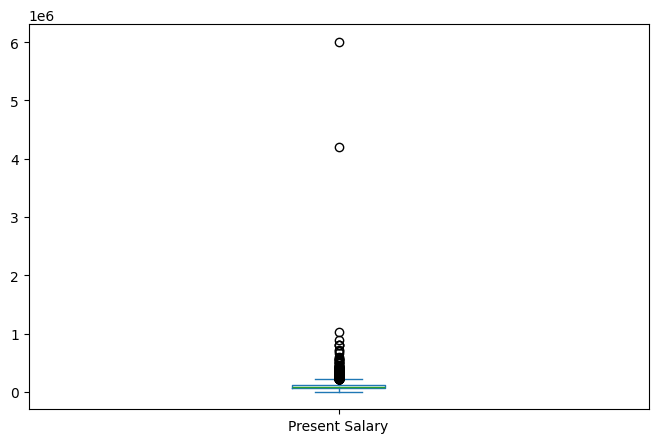

In [19]:
# df["Present Salary"].plot.box()
df['Present Salary'].plot.box(figsize=(8, 5))

### Analysis

**Question**: This visualization is different than any boxplot you saw in lecture!  **With your group**, discuss (1): why the box is almost unreadable and (2): explain your prediction of what the extreme outliers might be in this dataset.

*(✏️ There are a few extreme outliers that drag out the box plot and make the graph unproportionate to the amount of data. ✏️)*

###  Puzzle 1.3: The $500,000 Club

Create a new DataFrame, `df_over_500k`, that includes all employees who make more than $500,000.

In [21]:
df_over_500k = df[df["Present Salary"] > 500000]
df_over_500k

,Employee Name,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
470,"Jones, Robert J",CHANC UC & V PRES UI,Office of the Chancellor,NaN,Chancellor,1.0,1.0,799000.0,838950.00,NaN,BA,['PROF'],['Crop Sciences']
1099,"Cohen, Mark Steven",DEAN,Carle IL COM Administration,LT,Carle Illinois Medicine,1.0,1.0,725000.0,757625.00,NaN,BA,"['PROF', 'SVP & CHIEF ACADEMIC OFFICER', 'PROF...","['Bioengineering', 'Beckman Institute', 'Insti..."
1514,"Anderson, Timothy Oronde","ASST VAR COACH, MENS BSKTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,551250.0,551250.00,NaN,BA,NaN,NaN
1522,"Bielema, Bret Arnold",HEAD VARSITY COACH FOOTBALL,Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,6008000.0,6008000.00,NaN,BA,['HEAD VAR COACH FTBALL (AUTO)'],NaN
1530,"Buh, Andrew Toku","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,506000.0,506000.00,NaN,BA,"['ASST VAR COACH, FTBAL (AUTO)']",NaN
1531,"Bullen, Charles","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,556000.0,556000.00,NaN,BA,"['ASST COACH, FTBAL (AUTO)']",NaN
1563,"Frazier, Chester Lee","ASST VAR COACH, MENS BSKTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,551250.0,551250.00,NaN,BA,NaN,NaN
1574,"Green, Shauna Lee","HEAD VRST COACH, WBB",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,808000.0,808000.00,NaN,BA,"['HEAD VRST, WBB (AUTO)']",NaN
1584,"Henry, Aaron Rashad","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,700000.0,700000.00,NaN,BA,NaN,NaN
1594,"Jamison, Terrance Taron","ASST VARSITY COACH, FTBAL",Intercollegiate Athletics,NU,Div Intercollegiate Athletics,1.0,1.0,557200.0,557200.00,NaN,BA,"['ASST COACH, FTBAL (AUTO)']",NaN


Create a second DataFrame, `df_under_500k`, that includes all employees who make less than $500,000.

In [22]:
df_under_500k = df[df["Present Salary"] < 500000]
df_under_500k

,Employee Name,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Gerstenecker, David G",DIR OF INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,109670.28,112412.04,NaN,BA,NaN,NaN
1,"Henry, Joshua Keith",ASSOC DIR INFO TECHNOL,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,83701.83,88723.94,NaN,BA,NaN,NaN
2,"Meyer, Donald L",SR NETWORK ANLYS,ACES Technology Services,KL,"Agr, Consumer & Env Sciences",1.0,1.0,92692.76,96400.47,NaN,BA,NaN,NaN
3,"Winter-Nelson, Alex E",PROF,Agr & Consumer Economics,KL,"Agr, Consumer & Env Sciences",1.0,1.0,193532.64,204244.60,A,AA,"['DIR, ADMI', 'ASSOC DEAN FOR INATL PRGMS']","['ADM Institute for PHL', 'Agr, Consumer & Env..."
4,"Axtman-Barker, Pamela Ann",INSTR,Ag Ldrshp Educ Comm Program,KL,"Agr, Consumer & Env Sciences",1.0,1.0,75000.00,75000.00,NaN,AL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,"Chambers, Sonya L",EXEC DIR STRATG INITIATIVES,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,169500.00,176280.00,NaN,BA,NaN,NaN
6284,"Garrick, Sean C","VC FOR DVSTY, EQUITY & INCL",Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,351778.94,364091.20,NaN,BA,NaN,NaN
6285,"Guerra Perez, Gioconda",EXEC ASSOC VC FOR DVSTY,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,187250.00,195676.25,NaN,BA,NaN,NaN
6286,"VanDuyne, Adam Jareb",EXEC DIR FIN & ADMN,Vice Chancellor for Diversity,NV,Vice Chancellor for Diversity,1.0,1.0,147200.00,153824.00,NaN,BA,NaN,NaN


### Part 1.4: Boxplots (Round 2)

Create a boxplot of all employees who make less than $500,000:

<Axes: >

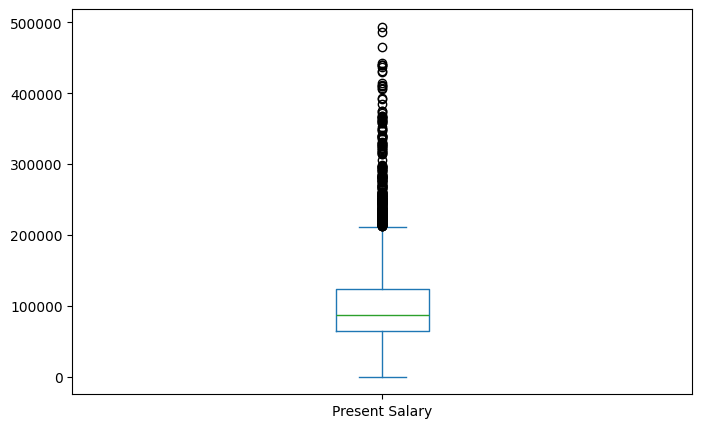

In [30]:
df_under_500k["Present Salary"].plot.box(figsize=(8, 5))

### Part 1.5: Histograms

Create a histogram of all employees who make less than $500,000:

<Axes: ylabel='Frequency'>

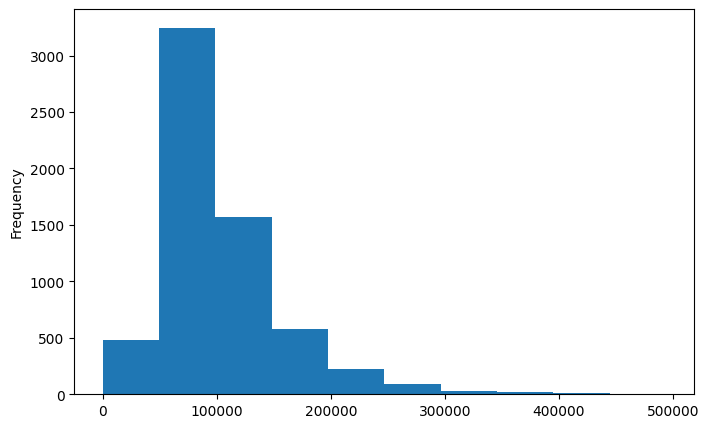

In [29]:
df_under_500k["Present Salary"].plot.hist(figsize=(8, 5))

### Analysis: Reflecting on Visualization

**Group Q: Do you think a histogram or boxplot best visualizes the salary data? What are the advantages (or disadvantages) of either visualization? Discuss this with your group.**

*(✏️ A histogram works better because the amount of money earned is a continuous numeric data, which makes a histogram a better fit in this question. ✏️)*

**Individual Q: Why is it valuable to look at visual displays of salary data in general (as opposed to just looking at descriptive statistics like the mean and standard deviation)?**

*(✏️ Although we know the mean and STD  though the use of discriptive statistics, it is harder to make accurate comparasons with only discriptive statistics since no one can memorize all the numbers. Using graphs visulize the comparason and makes comparing data easier since we will no longer have to memorize the data to compare them. ✏️)*

<hr style="color: #DD3403;">

## Part 2: Department-Level Data

Our Graybook dataset also includes the `Department Name` of each employee. This means you can see what department each professor is from and look at other employees in the same department.  

We can calculate **descriptive statistics** and look at visual displays of data on a **department level**!  Let’s explore whether or not there are salary **discrepancies** among departments.

### Puzzle 2.1: Grouping the Data

In lecture, you learned syntax that will help you **group** all of the people in each department so you can find departmental aggregates.  In other words, we want to group by `'Department Name'`.

To make things easier to read, we will first modify your DataFrame to include only the `Department Name` and `Present Salary` fields before you `groupby`.

First, using the cell below, create a second DataFrame named `df2` **containing only** the `Department Name` and `Present Salary` columns. Remember to use **double square-brackets** to specify these columns. Here's an example of the syntax: `df[['col1', 'col2']]`.
- Make sure to use `df` that contains ALL employees.

In [42]:
df2 = df[["Department Name", "Present Salary"]]
df2

,Department Name,Present Salary
0,ACES Technology Services,109670.28
1,ACES Technology Services,83701.83
2,ACES Technology Services,92692.76
3,Agr & Consumer Economics,193532.64
4,Ag Ldrshp Educ Comm Program,75000.00
...,...,...
6283,Vice Chancellor for Diversity,169500.00
6284,Vice Chancellor for Diversity,351778.94
6285,Vice Chancellor for Diversity,187250.00
6286,Vice Chancellor for Diversity,147200.00


Now, `groupby` Department Name and find the mean Present Salary for each department to create `agg_mean_df`:

In [69]:
agg_mean_df = df2.groupby("Department Name").mean().reset_index()
agg_mean_df.rename(columns={"Present Salary":"Mean Present Salary"})

,Department Name,Mean Present Salary
0,ACES Technology Services,95354.956667
1,Academy Entrepreneurial Ldrshp,70106.250000
2,Accountancy,203306.539167
3,Advertising,110357.368571
4,Aerospace Engineering,128730.730909
...,...,...
253,Veterinary Diagnostic Lab,92295.783500
254,Veterinary Teaching Hospital,135407.375882
255,Vice Chancellor for Diversity,179775.240000
256,Web Services,138365.430000


### 🔬 Test Case Checkpoint 🔬

In [59]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert ( len(df2.columns) == 2 ), "Make sure your df2 contains only the Department Name and Present Salary columns."
assert ("agg_mean_df" in vars()), "Make sure your aggregated DataFrame of means is named 'agg_mean_df'."
assert( len(agg_mean_df) == 258 ), "You should have 264 different departments.  Check to make sure you've grouped the data correctly."
assert( "Present Salary" in agg_mean_df ), "Your agg_mean_df is missing the Salary column."
assert( math.isclose(agg_mean_df['Present Salary'].mean(), 103214.15081569373 ) ), "Your salary values are incorrect. Double-check that you are aggregating by `mean`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.2: Department Comparisons

Let’s look at how the **mean salaries** differ across departments.

Using your `agg_mean_df`, in the following three cells, find the **mean** present salary for each of these departments:
- The department of `English`, stored in the variable `mean_eng`
- The department of `Psychology`, stored in the variable `mean_psych`
- The department of `Electrical & Computer Eng`, stored in the variable `mean_ece`

Remember, you can filter your `agg_mean_df` to these **departments** by using the `names` provided above (**"English"**, **"Psychology"**, and **"Electrical & Computer Eng"**). Then, just find the mean `Present Salary` for each of these departments. Make sure that your output returns the mean `Present Salary` as a number, not just a DataFrame with the mean in one of the rows.


In [72]:
mean_eng = agg_mean_df[agg_mean_df["Department Name"] == "English"]["Present Salary"]
mean_eng

85    76977.860606
Name: Present Salary, dtype: float64

In [73]:
mean_psych = agg_mean_df[agg_mean_df["Department Name"] == "Psychology"]["Present Salary"]
mean_psych

205    119444.842
Name: Present Salary, dtype: float64

In [74]:
mean_ece = agg_mean_df[agg_mean_df["Department Name"] == "Electrical & Computer Eng"]["Present Salary"]
mean_ece

80    159314.705625
Name: Present Salary, dtype: float64

### 🔬 Test Case Checkpoint 🔬

In [75]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( math.isclose( float(mean_eng), 76977.86060606061 ) ), "The mean salary you calculated of the English department is incorrect."
assert( math.isclose( float(mean_psych), 119444.842 ) ), "The mean salary you calculated of the Psychology department is incorrect."
assert( math.isclose( float(mean_ece), 159314.705625 ) ), "The mean salary you calculated of the ECE department is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/1711281056.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( math.isclose( float(mean_eng), 76977.86060606061 ) ), "The mean salary you calculated of the English department is incorrect."
/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/1711281056.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( math.isclose( float(mean_psych), 119444.842 ) ), "The mean salary you calculated of the Psychology department is incorrect."
/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/1711281056.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( math.isclose( float(mean_ece), 159314.70562

### Analysis: Department Differences

**Group Q: Discuss this with your group. Why do you think certain departments have higher mean salaries than others? Are there potential confounding factors or explanations for the differences?**

*(✏️ Certain departments may have less professors and the lack of supply may boost the salary for certain departments. A confounding variable is that some departments have more experienced professors and thus increasing the average for salaries. ✏️)*

### Puzzle 2.3: Grouping the Data, Again

We have an aggregated DataFrame of the salaries by department, but what if we want to find the number of employees in each department? 

Luckily, `pandas` lets us `groupby` and count the **number of rows** in each group. This is known as aggregating by `count`. Because each row represents a single employee, we can use this to find the number of employees per department. 

In the cell below, using your `df2` from earlier, create `agg_count_df` which finds the number of employees in each department:

In [86]:
agg_count_df = df2.groupby("Department Name").agg("count").reset_index()
agg_count_df.rename(columns={"Present Salary":"Number of employees"})

,Department Name,Number of employees
0,ACES Technology Services,3
1,Academy Entrepreneurial Ldrshp,2
2,Accountancy,72
3,Advertising,21
4,Aerospace Engineering,33
...,...,...
253,Veterinary Diagnostic Lab,40
254,Veterinary Teaching Hospital,17
255,Vice Chancellor for Diversity,6
256,Web Services,2


If done correctly, your `agg_count_df` should now contain the number of employees in each department under the `Present Salary` column because grouping by `count` **counts the rows in each department**. But this column name is **misleading**. 

**Run the provided cell below** to rename the `Present Salary` column to `Num Employees`:

In [87]:
agg_count_df.rename(columns={"Present Salary": "Num Employees"}, inplace=True)
agg_count_df

,Department Name,Num Employees
0,ACES Technology Services,3
1,Academy Entrepreneurial Ldrshp,2
2,Accountancy,72
3,Advertising,21
4,Aerospace Engineering,33
...,...,...
253,Veterinary Diagnostic Lab,40
254,Veterinary Teaching Hospital,17
255,Vice Chancellor for Diversity,6
256,Web Services,2


### 🔬 Test Case Checkpoint 🔬

In [81]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert ("agg_count_df" in vars()), "Make sure your aggregated DataFrame of employee counts is named 'agg_count_df'."
assert( len(agg_count_df) == 258 ), "You should have 258 different departments.  Check to make sure you've grouped the data correctly."
assert( "Num Employees" in agg_count_df ), "Your agg_count_df is missing the Num Employees column. Make sure you ran the provided cell to rename the column."
assert( math.isclose( agg_count_df['Num Employees'].mean(), 24.372093023255815 ) ), "Your employee counts are incorrect. Double-check that you are aggregating by `count`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.4: Employee Counts

Now, using your `agg_count_df`, in the following three cells, find the **number of employees** for each of these departments:
- The department of `English`, stored in the variable `eng_employees`
- The department of `Psychology`, stored in the variable `psych_employees`
- The department of `Electrical & Computer Eng`, stored in the variable `ece_employees`

This should be quite similar to your solutions to Puzzle 2.2 above, but now we need to use the **"Num Employees"** column.

In [89]:
eng_employees = agg_count_df[agg_count_df["Department Name"] == "English"]["Num Employees"]
eng_employees

85    99
Name: Num Employees, dtype: int64

In [90]:
psych_employees = agg_count_df[agg_count_df["Department Name"] == "Psychology"]["Num Employees"]
psych_employees

205    70
Name: Num Employees, dtype: int64

In [91]:
ece_employees = agg_count_df[agg_count_df["Department Name"] == "Electrical & Computer Eng"]["Num Employees"]
ece_employees

80    112
Name: Num Employees, dtype: int64

### 🔬 Test Case Checkpoint 🔬

In [92]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( float(eng_employees) == 99), "The number of employees calculated of the English department is incorrect."
assert( float(psych_employees) == 70), "The number of employees you calculated of the Psychology department is incorrect."
assert( float(ece_employees) == 112), "The number of employees you calculated of the ECE department is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/3207204063.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( float(eng_employees) == 99), "The number of employees calculated of the English department is incorrect."
/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/3207204063.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( float(psych_employees) == 70), "The number of employees you calculated of the Psychology department is incorrect."
/var/folders/ns/z4mk9l_x1_q4v3pm60vk8ns40000gn/T/ipykernel_55530/3207204063.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  assert( float(ece_employees) == 112), "The number of employees you calculated of t

### Analysis: Employees and Salaries

**Group Q: Do you think department employee counts have any influence on the average salaries you observed earlier? Why or why not?**

*(✏️ There is insufficient evdience to claim that the average salary is affected by the amount of salaries. However, we can see a correlation between more professors and higher salaries in these examples. ✏️)*

### Puzzle 2.5: Revisiting Visualization

Earlier, we observed the importance of data visualization with histograms and boxplots. Let's apply these plotting techniques to the aggregated DataFrames you've recently created! 

First, using your DataFrame `agg_mean_df`, generate a histogram displaying the distribution of department `Present Salary` means across UIUC:

<Axes: ylabel='Frequency'>

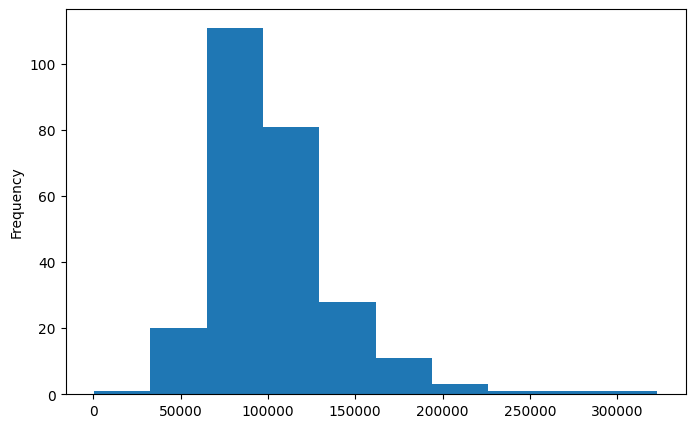

In [94]:
agg_mean_df["Present Salary"].plot.hist(figsize=(8, 5))

Now, using your DataFrame `agg_count_df`, generate a histogram displaying the distribution of `Num Employees` in departments across UIUC:

<Axes: ylabel='Frequency'>

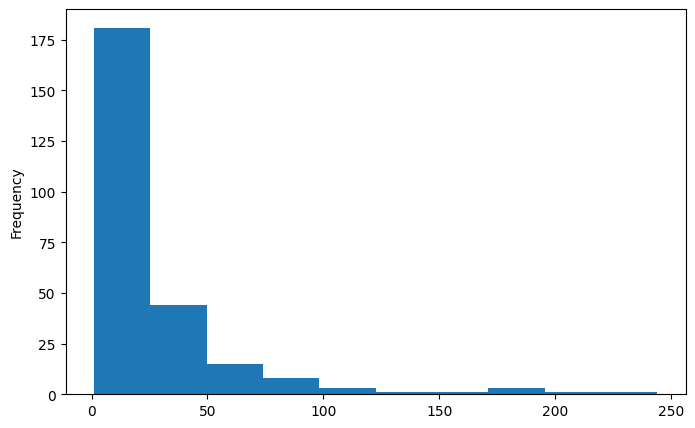

In [95]:
agg_count_df["Num Employees"].plot.hist(figsize=(8, 5))

### Analysis: Histogram Takeaways

**Individual Q: Write down at least three observations you can make from the histograms generated above. Make sure each one is a complete sentence.**

*(✏️ The mean present salary is around 100000. The mean salary has a normal spread. The amount of employees is skewed to the left ✏️)*

<hr style="color: #DD3403;">

## Part 3: Gender and Salaries

Data can often reveal **systemic problems or discrimination**. For example, in many companies, men and women are promoted at **different rates**.  Let’s look at a subset of the salary dataset to investigate whether or not there is a **difference in salaries** between faculty who identify as men and women in two departments: **STAT** and **CS** (Karle and Wade’s home departments). 

We've compiled data from these departments, added a `Gender` column, and placed it in a dataset called `STAT_CS_gender.csv`. 

This data is also located in the **same directory as this lab**. To load it in, just specify the **local file path** (`"STAT_CS_gender.csv"`)!

### Puzzle 3.1: Loading Our Dataset
Using the cell below, import `STAT_CS_gender.csv`, store it in a variable called `STAT_CS_df`, and display it to see what it looks like!

In [96]:
STAT_CS_df = pd.read_csv("STAT_CS_gender.csv")
STAT_CS_df

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Abdelzaher, Tarek",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,220000.00,228800.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Information Trust..."
1,"Adve, Sarita V",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Electrical & Comp..."
2,"Adve, Vikram Sadanand",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI', 'PROF, NCSA']","['Coordinated Science Lab', 'Information Trust..."
3,"Alagappan, Ramnatthan",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
4,"Alawini, Abdussalam Alhadi M",M,TCH ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,138000.00,153600.00,M,AA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Zhang, Lingming",M,ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,155000.00,163200.00,A,AA,NaN,NaN
141,"Zhao, Han",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,['Electrical & Computer Eng']
142,"Zhao, Sihai Dave",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,135475.46,141247.33,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASST...","['Biomed & Translational Sci', 'Bioengineering..."
143,"Zhu, Ruoqing",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,117159.38,125845.76,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASSO...","['Biomed & Translational Sci', 'Institute for ..."


Now, let's create **two subsets** of our `STAT_CS_df`. 

Using conditionals in the cells below, create:
- `STAT_CS_M`, a `DataFrame` of the staff and faculty who identify as Male (**"M"**) under the `Gender` column 
- `STAT_CS_F`, a `DataFrame` of the staff and faculty who identified as Female (**"F"**) under the `Gender` column 

In [97]:
STAT_CS_M = STAT_CS_df[STAT_CS_df["Gender"] == "M"]
STAT_CS_M

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
0,"Abdelzaher, Tarek",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,220000.00,228800.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Information Trust..."
2,"Adve, Vikram Sadanand",M,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI', 'PROF, NCSA']","['Coordinated Science Lab', 'Information Trust..."
3,"Alagappan, Ramnatthan",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
4,"Alawini, Abdussalam Alhadi M",M,TCH ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,138000.00,153600.00,M,AA,NaN,NaN
6,"Angrave, Lawrence Christopher",M,TCH PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,160000.00,171000.00,M,AA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Zhang, Lingming",M,ASSOC PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,155000.00,163200.00,A,AA,NaN,NaN
141,"Zhao, Han",M,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,['Electrical & Computer Eng']
142,"Zhao, Sihai Dave",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,135475.46,141247.33,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASST...","['Biomed & Translational Sci', 'Bioengineering..."
143,"Zhu, Ruoqing",M,ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,117159.38,125845.76,A,AA,"['ASSOC PROF, CI MED', 'AFFILIATE, IGB', 'ASSO...","['Biomed & Translational Sci', 'Institute for ..."


In [98]:
STAT_CS_F = STAT_CS_df[STAT_CS_df["Gender"] == "F"]
STAT_CS_F

,Employee Name,Gender,Primary Job Title,Department Name,College Code,College Name,Present FTE,Proposed FTE,Present Salary,Proposed Salary,Tenure,Empl Class,Secondary Job Titles,Secondary Department Names
1,"Adve, Sarita V",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,230000.00,240000.00,A,AA,"['PROF, CSL', 'PROF, ITI']","['Coordinated Science Lab', 'Electrical & Comp..."
5,"Amato, Nancy Marie",F,PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,293100.00,309775.00,A,AA,"['HEAD', 'PROF, CSL', 'PROF, HCESC', 'AFFILIAT...","['Coordinated Science Lab', 'Institute for Gen..."
10,"Bravo De Guenni, Lelys",F,CLIN ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,100000.00,105000.00,NaN,AA,NaN,['Latin American & Carib Studies']
19,"Chronopoulou, Alexandra",F,CLIN ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,105570.00,109792.80,NaN,AA,['CSBS AFFILIATE'],"['Coordinated Science Lab', 'Interdis Health S..."
21,"Cobb, Camille Morgan",F,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,136000.00,141440.00,P,AA,NaN,NaN
24,"Cunningham, Kathryn Irene",F,ASST PROF,Computer Science,KP,Grainger Engineering,1.0,1.0,135000.00,140400.00,P,AA,NaN,NaN
27,"Dayanikli, Gokce",F,ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,118000.00,118000.00,P,AA,NaN,NaN
28,"Deeke, Julie M",F,TCH ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,90045.00,93646.80,NaN,AA,NaN,NaN
34,"Ellison, Victoria Marie",F,TCH ASST PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,90134.50,93739.88,NaN,AA,NaN,NaN
41,"Flanagan, Karle Ann",F,TCH ASSOC PROF,Statistics,KV,Liberal Arts & Sciences,1.0,1.0,104000.00,115760.00,NaN,AA,['DIR INCLSV DATA SCI ED'],['LAS Administration']


### 🔬 Test Case Checkpoint 🔬

In [99]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert("STAT_CS_df" in vars()), "Ensure you've named your original DataFrame `STAT_CS_df`."
assert(len(STAT_CS_df) == 145), "This is not the STAT_CS_df you are looking for."
assert("STAT_CS_M" in vars()), "Ensure your male subset of STAT_CS_df is named `STAT_CS_M`."
assert(len(STAT_CS_M) == 106), "Double check your conditional to generate STAT_CS_M - the number of rows is incorrect."
assert("STAT_CS_F" in vars()), "Ensure your female subset of STAT_CS_df is named `STAT_CS_F`."
assert(len(STAT_CS_F) == 39), "Double check your conditional to generate STAT_CS_F - the number of rows is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Merging Two Columns into One DataFrame

To create a new DataFrame containing only the data you found above, the following provided line of code creates `df_salary_by_gender`:

In [100]:
df_salary_by_gender = pd.DataFrame({
    "female": STAT_CS_F["Present Salary"],
    "male": STAT_CS_M["Present Salary"],
})

Take a look at the DataFrame `df_salary_by_gender`.  Every row will either have data for in the `female` column or the `male` column:

In [101]:
df_salary_by_gender

,female,male
0,NaN,220000.00
1,230000.0,NaN
2,NaN,230000.00
3,NaN,135000.00
4,NaN,138000.00
...,...,...
140,NaN,155000.00
141,NaN,136000.00
142,NaN,135475.46
143,NaN,117159.38


### Puzzle 3.3: Visualization

Let's create a visualization! Using the next cell, create a **boxplot** of `df_salary_by_gender` that includes both genders:

<Axes: >

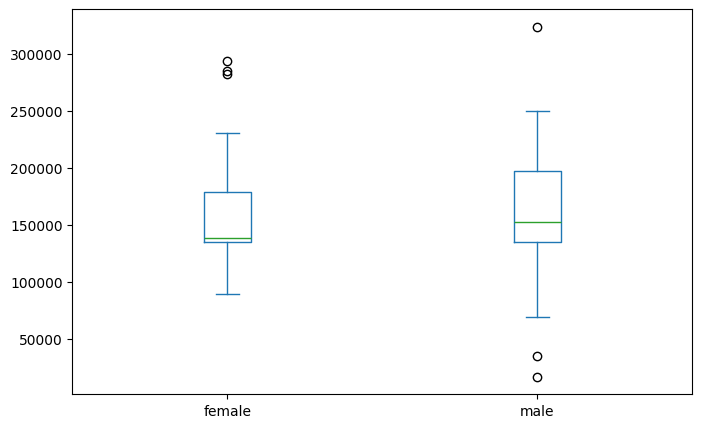

In [102]:
df_salary_by_gender.plot.box(figsize =(8, 5))

### Puzzle 3.4: EDA, Again

Now that we've visualized the data, let's explore some basic statistics once more to gain further insight. 

In the following cells, calculate:
- The **mean** `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `mean_m`
- The **median** `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `median_m`
- The **standard deviation** of `Present Salary` for **Male** STAT/CS Faculty, storing in the variable `std_m`

In [106]:
mean_m = STAT_CS_M["Present Salary"].mean()
mean_m

157679.5082075472

In [107]:
median_m = STAT_CS_M["Present Salary"].median()
median_m

152500.0

In [108]:
std_m = STAT_CS_M["Present Salary"].std()
std_m

49368.32738020144

Now, in the cells below, calculate:

- The **mean** `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `mean_f`
- The **median** `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `median_f` 
- The **standard deviation** of `Present Salary` for **Female** STAT/CS Faculty, storing in the variable `std_f`

In [103]:
mean_f = STAT_CS_F["Present Salary"].mean()
mean_f

157847.47794871795

In [104]:
median_f = STAT_CS_F["Present Salary"].median()
median_f

138000.0

In [105]:
std_f = STAT_CS_F["Present Salary"].std()
std_f

50583.79948660857

Run the following cell to make a summary table of your previously calculated data:

In [109]:
pd.DataFrame([
  {"Gender": "F", "Mean ($)": round(mean_f), "Median ($)": round(median_f), "Standard Deviation ($)": round(std_f)},
  {"Gender": "M", "Mean ($)": round(mean_m), "Median ($)": round(median_m), "Standard Deviation ($)": round(std_m)},
])

,Gender,Mean ($),Median ($),Standard Deviation ($)
0,F,157847,138000,50584
1,M,157680,152500,49368


### 🔬 Test Case Checkpoint 🔬

In [110]:
## == TEST CASES for Puzzle 3.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( math.isclose( mean_f, 157847.477949 ) )
assert( math.isclose( median_f, 138000.0 ) )
assert( math.isclose( std_f, 50583.799487 ) )
assert( math.isclose( mean_m, 157679.508208 ) )
assert( math.isclose( median_m, 152500.0 ) )
assert( math.isclose( std_m, 49368.327380 ) )

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: EDA Takeaways

**Q: Now that you've calculated descriptive statistics of the `Present Salary` of Male and Female STAT/CS Faculty, how do the numbers support or counter the boxplot observations you made earlier? Can we draw any conclusions about gender-based salary discrimination from our data? Use the analysis you did to support your answer.**

*(✏️ Female mean salaries has been increased with the outliers on the top. However, male mean salary has been decreased with some outliers on the bottom. The standard deviation for women is higher compared to the men, which couldn't be seen on the box and whiskers graph. ✏️)*

<hr style="color: #DD3403;">

## Part 4: Exploring Your Own Interests


At this point of the lab, we have investigated a lot of questions.

However, these have been questions that **we told you to answer**. As a data scientist, it is important to be able to use the data science skills that you learn in the classroom to answer questions that **you have**.

Think about **two questions** that you have about the **Graybook** or **STAT_CS_Gender** datasets that have not been answered. These can be simple questions. Record them below.  Then, answer at least one of these questions using Python and either dataset.  

*(✏️ What is the median salary for both men and women? What is the standard deviation for both men and women? ✏️)*


Now, use the cell below to **find the answer** to **one** of your questions! Remember, it can be something simple. 

In [112]:
df["Present Salary"].median()

87975.0

**Group Q: Share the question you had and the results with your group.**

*(✏️ I answered the question "What is the median salary for both men and women?". The median salary for both men and women is lower than either men median and women median, an example of simpsons paradox. ✏️)*

<hr style="color: #DD3403;">

## Part 5: Beyond DISCOVERY

As a data scientist, it is important to think about the implications of collecting and not collecting certain data.  Data that is **not** collected in an analysis is called *counter data*.  

Many times, data is collected to make a profit.  Data has even been referred to as “the new oil” because it is oftentimes seen as an uncapped natural resource and if you can figure out how to capture and refine it, it can lead to a massive profit.

It’s important to think about **who** data analysis can benefit and who it can harm.  It’s also important to think about **why** the data is collected and why counter data is not collected.  


**Individual Q: Write a paragraph style response (at least 5 complete sentences) summarizing your takeaways from working with the salary data in this lab. We have listed a few questions below to give you some ideas on what to write about if you need them.**

- What is some counter data that you’d like to collect in regard to salaries? Why do you think it’s important to collect this data?  
- Who benefits from collecting this salary data?  Who does this data harm?
- Why do you think this salary data is public? Can you think of any reasons that this could be problematic? 
- What did you learn from looking at the salaries stratified by gender?

*(✏️ Some counter data I'd like to collect would be the age and education level of the professors in each department. Since experience and education level have an impact on income, the income differnece for professors may also be explained. Professor and people who are applying to jobs may benefit from this data because they will be able to see how their effort and experience may impact their income. However, this data may also harm professors and other employees who are earning large amounts of income based on other work like maintaining relationships with sponsor companies. This data is pblic because professors at the univesity are employees of the state and under state law their earnings have to be public to for public trust. This could also be an issue because anyone will know your salary and can decide to rob you or not. I learned that the payroll between men and women is relatively equal and there may be other confounders acting on the salary of each professor. ✏️)*


<hr style="color: #DD3403;">

## **Submission** 


You're almost done! All you need to do is to commit your lab to GitHub:

1. Make certain to save your work. To do this, go to **File => Save All**

2. After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)